In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.core.interactiveshell import InteractiveShell
pd.set_option('display.precision', 3)
InteractiveShell.ast_node_interactivity = "all"

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn import preprocessing

In [28]:
# turn off annoying warnings
import warnings
warnings.filterwarnings('ignore')

# for reproducibility
np.random.seed(7)

In [29]:
Coords = pd.read_csv("Coordinates.csv", header=0, delimiter=',')
Coords.shape
Coords.head()

(100, 6)

,product_number,Coordinate 1,Coordinate 2,Coordinate 3,Coordinate 4,Coordinate 5
0,6909,-0.292,0.211,0.086,0.104,-0.213
1,7896,0.036,-0.034,0.197,0.180,-0.067
2,8883,0.030,-0.093,0.148,0.123,-0.089
3,9870,-0.096,-0.228,-0.174,0.043,-0.039
4,10857,-0.095,-0.241,-0.171,0.068,-0.056


Let's find the correct k:

<AxesSubplot:>

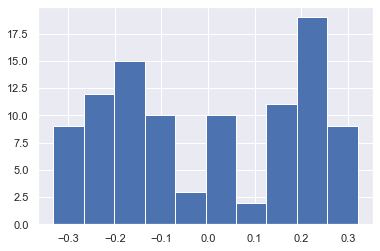

In [30]:
Coords['Coordinate 1'].hist()

In [31]:
std_scaler = preprocessing.StandardScaler()
Coords[['Coordinate 1','Coordinate 2', 'Coordinate 3' , 'Coordinate 4', 'Coordinate 5']]= preprocessing.scale(Coords[['Coordinate 1','Coordinate 2', 'Coordinate 3' , 'Coordinate 4', 'Coordinate 5']])

<AxesSubplot:>

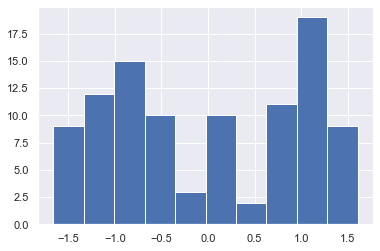

In [32]:
Coords['Coordinate 1'].hist()

In [33]:
index= pd.MultiIndex.from_arrays([['kmeans'], [3]], names=('model', 'K'))
results_df = pd.DataFrame(index=index, columns= ['CH score', 'Silhouette score', 'DB score'])

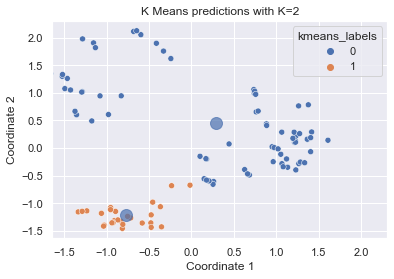

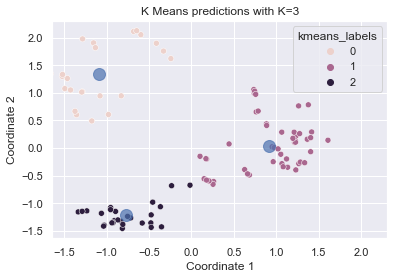

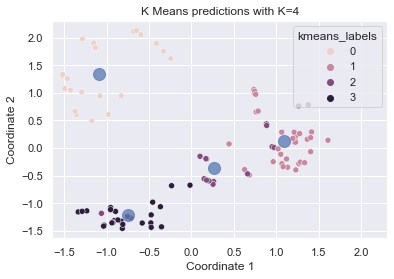

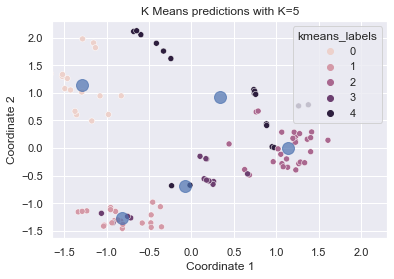

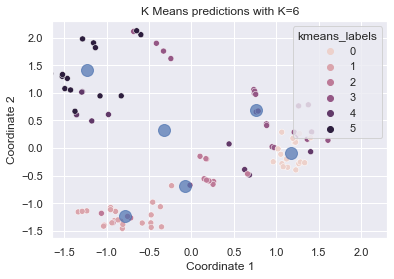

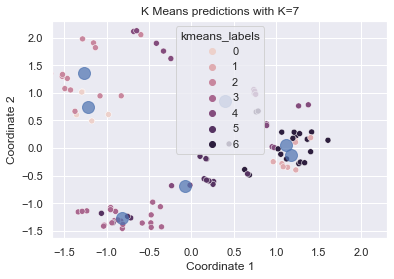

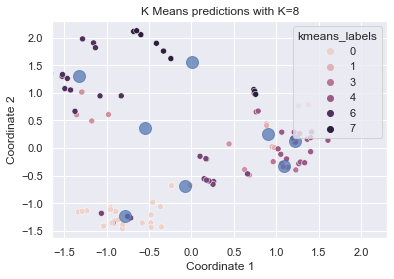

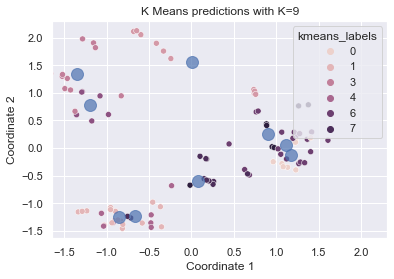

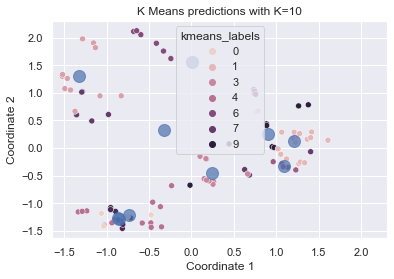

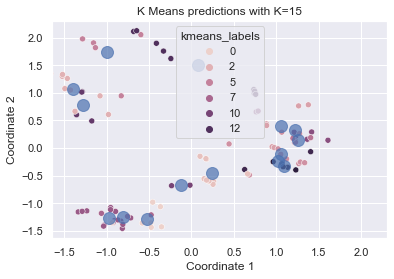

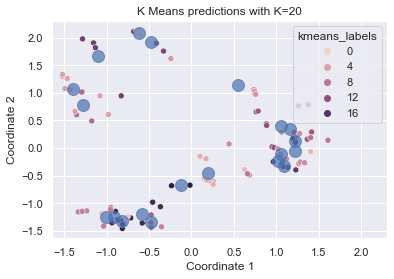

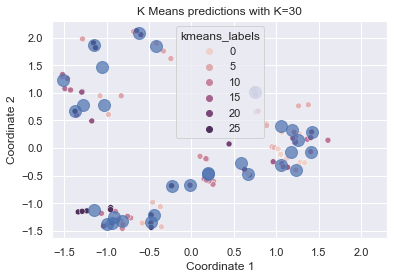

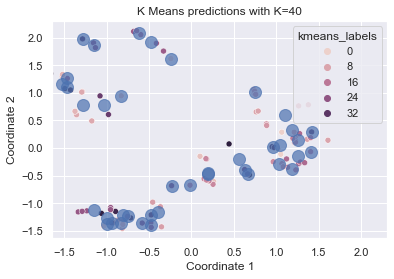

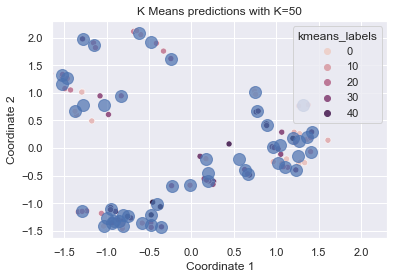

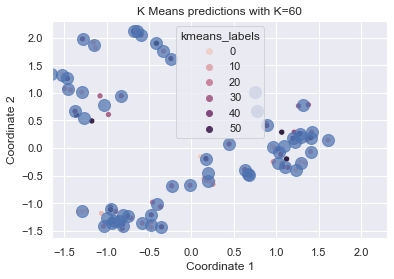

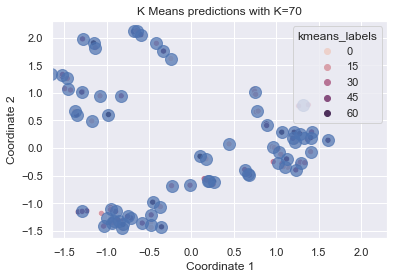

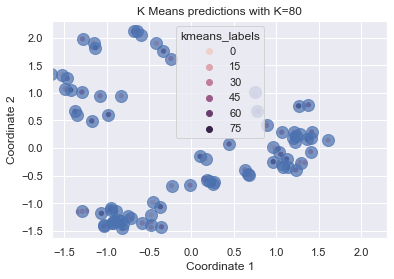

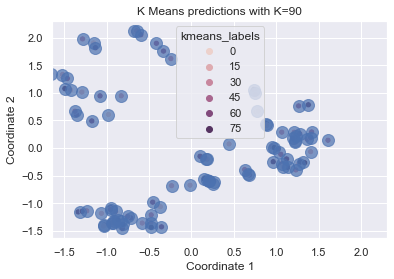

In [34]:
def compute_clustering_and_plot(K, data, results):

    # Train the model with k-means with given K
    kmeans = KMeans(n_clusters=K, max_iter=100)
    kmeans.fit(data);
    data['kmeans_labels'] = kmeans.labels_

    # Plot results
    sns.scatterplot(x='Coordinate 1', y='Coordinate 2', hue='kmeans_labels', data=data);
    plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'bo', markersize=12,alpha=0.7);
    plt.xlim(plt.ylim());
    plt.title(f'K Means predictions with K={K}');
    plt.show();

    # Compute metrics
    CH = calinski_harabasz_score(data, kmeans.labels_ )
    S = silhouette_score(data, kmeans.labels_ )
    DB = davies_bouldin_score(data, kmeans.labels_ )
    
    # store metrics
    results.loc[('kmeans', k),:] = [CH,S,DB]
    return results

K_values = [2,3,4,5,6, 7, 8, 9 ,10, 15, 20, 30, 40, 50, 60, 70, 80, 90]

for k in K_values:
    results = compute_clustering_and_plot(k, Coords.loc[: , ['Coordinate 1', 'Coordinate 2', 'Coordinate 3', 'Coordinate 4', 'Coordinate 5']],results_df)

In [35]:
results_df.sort_values(by='CH score', ascending=False)

CH score Silhouette score DB score
model  K                                      
kmeans 90  80550.087             0.18    0.017
       80  23673.489            0.309    0.038
       70  10927.113             0.46    0.061
       60   6101.116            0.599    0.109
       50   2569.215            0.669    0.157
       40   1212.128            0.661    0.216
       30    546.935            0.644    0.318
       20    252.028             0.63     0.48
       15    168.854            0.606    0.533
       10      91.99            0.551    0.692
       9       87.49            0.509    0.727
       8      79.518            0.472    0.766
       7      61.202            0.474     0.79
       6      58.783            0.428    0.901
       5      51.517            0.421    0.905
       4      43.895            0.352    1.131
       3      35.824            0.318    1.328
       2      27.257            0.243    1.498

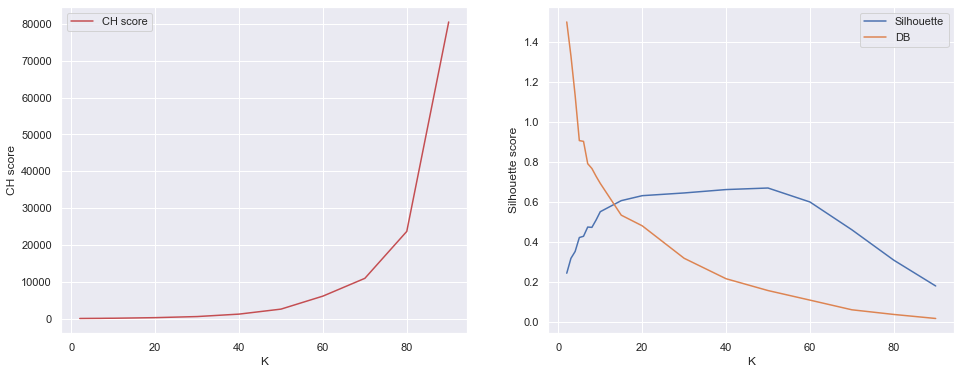

In [36]:
results_df = results_df.sort_index()
results_df = results_df.astype(float)

fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.lineplot(x='K', y='CH score',data=results_df.reset_index(),label='CH score', color='r', ax=ax[0]);
sns.lineplot(x='K', y='Silhouette score',data=results_df.reset_index(),label='Silhouette',ax=ax[1]);
sns.lineplot(x='K', y='DB score',data=results_df.reset_index(),label='DB');